# Modern Portfolio Theory Implementation 

In [1]:
import numpy as np
np.set_printoptions(suppress=True)

import datetime as dt
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import scipy as stats
from scipy import optimize
import plotly.graph_objects as go

In [2]:
# importing data 
def get_data(stocks, start, end):  
    stock_data  = pdr.get_data_yahoo(stocks, start = start, end = end)
    stock_data = stock_data["Close"]
    returns = stock_data.pct_change()
    mean_returns = returns.mean()
    cov_matrix= returns.cov()
    return mean_returns, cov_matrix, stock_data

In [3]:
stock_list = ["VIG","SCHD", "DGRO","FVD","SDIV" ,"AMLP","VNQ", "VTEB","PZA", "BOND", "ISTB", "SFHIX","ANGL","BNDX","ESFIX", "FTEC","FHLC","FUTY", "FENY", "FNCL", "FSTA", "FDIS","FCOM"]


In [4]:
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days = 365)

In [5]:
len(stock_list)

23

In [6]:
def get_cov_mean_ret():
    df= pd.read_csv("sandp.csv",index_col = [0], parse_dates = [0])
    returns = df.pct_change()
    mean_returns = returns.mean()
    cov_matrix= returns.cov()
    return mean_returns, cov_matrix

In [7]:
mean_returns_1, cov_matrix_1, df = get_data(stock_list, start_date, end_date)


In [8]:
mean_returns_1

Symbols
VIG     -0.000316
SCHD    -0.000131
DGRO    -0.000247
FVD     -0.000197
SDIV    -0.002018
AMLP     0.000810
VNQ     -0.000993
VTEB    -0.000542
PZA     -0.000825
BOND    -0.000856
ISTB    -0.000388
SFHIX   -0.000236
ANGL    -0.000824
BNDX    -0.000654
ESFIX   -0.001835
FTEC    -0.000876
FHLC    -0.000183
FUTY     0.000062
FENY     0.001978
FNCL    -0.000592
FSTA     0.000105
FDIS    -0.001200
FCOM    -0.001906
dtype: float64

In [9]:
cov_matrix_1

Symbols,VIG,SCHD,DGRO,FVD,SDIV,AMLP,VNQ,VTEB,PZA,BOND,ISTB,SFHIX,ANGL,BNDX,ESFIX,FTEC,FHLC,FUTY,FENY,FNCL,FSTA,FDIS,FCOM
Symbols,,,,,,,,,,,,,,,,,,,,,,,
VIG,0.000151,0.000133,0.000146,0.000123,0.000108,0.000114,0.000149,0.000008,0.000010,0.000016,9.603683e-06,1.007726e-05,0.000064,1.120015e-05,0.000007,0.000216,0.000131,0.000107,1.099720e-04,0.000169,0.000112,0.000214,0.000178
SCHD,0.000133,0.000131,0.000133,0.000115,0.000103,0.000123,0.000131,0.000006,0.000006,0.000012,7.803823e-06,9.452228e-06,0.000055,7.626125e-06,0.000006,0.000179,0.000114,0.000101,1.306194e-04,0.000160,0.000103,0.000179,0.000152
DGRO,0.000146,0.000133,0.000144,0.000121,0.000111,0.000119,0.000144,0.000007,0.000009,0.000015,9.125944e-06,1.016847e-05,0.000062,1.034135e-05,0.000007,0.000206,0.000127,0.000106,1.193814e-04,0.000171,0.000109,0.000204,0.000173
FVD,0.000123,0.000115,0.000121,0.000112,0.000096,0.000105,0.000134,0.000007,0.000009,0.000015,8.645667e-06,8.720120e-06,0.000052,1.173766e-05,0.000008,0.000158,0.000108,0.000111,1.048882e-04,0.000142,0.000099,0.000159,0.000136
SDIV,0.000108,0.000103,0.000111,0.000096,0.000204,0.000157,0.000131,0.000009,0.000012,0.000015,1.030487e-05,1.402178e-05,0.000059,1.005747e-05,0.000020,0.000168,0.000095,0.000081,1.712546e-04,0.000150,0.000075,0.000179,0.000158
AMLP,0.000114,0.000123,0.000119,0.000105,0.000157,0.000333,0.000132,0.000008,0.000008,0.000012,8.980185e-06,1.508272e-05,0.000057,7.068441e-06,0.000015,0.000166,0.000093,0.000100,3.485501e-04,0.000158,0.000081,0.000178,0.000146
VNQ,0.000149,0.000131,0.000144,0.000134,0.000131,0.000132,0.000215,0.000011,0.000015,0.000022,1.315014e-05,1.205758e-05,0.000073,1.983929e-05,0.000012,0.000210,0.000139,0.000137,1.207294e-04,0.000167,0.000112,0.000212,0.000182
VTEB,0.000008,0.000006,0.000007,0.000007,0.000009,0.000008,0.000011,0.000006,0.000008,0.000006,3.187776e-06,1.280232e-06,0.000009,5.346113e-06,0.000003,0.000010,0.000007,0.000009,4.539224e-06,0.000007,0.000006,0.000012,0.000008
PZA,0.000010,0.000006,0.000009,0.000009,0.000012,0.000008,0.000015,0.000008,0.000016,0.000009,4.724522e-06,1.570646e-06,0.000014,8.610117e-06,0.000003,0.000016,0.000010,0.000013,1.939836e-06,0.000008,0.000007,0.000016,0.000012


In [10]:
# s_and_p = pd.read_csv("S&P500-Symbols.csv")

In [11]:
# # getting S&P stock list from csv
# stock_list = s_and_p["Symbol"].to_list()
# # Replacing all "." with "" in the string # stock 
# stocks = [stock.replace(".", "") for stock in stock_list]
   

In [12]:
# stock_list

In [13]:
# to add a different country
# stock = [stock+'.AX' for stocks in stock_list].... Australian stocks 

In [14]:
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days = 365)

In [15]:
mean_returns, cov_matrix, stock_data = get_data(stock_list,start = start_date, end = end_date)

In [16]:
df = stock_data
mean_returns_1 = mean_returns
cov_matrix_1 =cov_matrix

In [17]:
df.isna().mean()

Symbols
VIG      0.000000
SCHD     0.000000
DGRO     0.000000
FVD      0.000000
SDIV     0.000000
AMLP     0.000000
VNQ      0.000000
VTEB     0.000000
PZA      0.000000
BOND     0.000000
ISTB     0.000000
SFHIX    0.003968
ANGL     0.000000
BNDX     0.000000
ESFIX    0.003968
FTEC     0.000000
FHLC     0.000000
FUTY     0.000000
FENY     0.000000
FNCL     0.000000
FSTA     0.000000
FDIS     0.000000
FCOM     0.000000
dtype: float64

In [18]:
df=df.dropna(axis=1, how="any") 

In [19]:
df.head()

Symbols,VIG,SCHD,DGRO,FVD,SDIV,AMLP,VNQ,VTEB,PZA,BOND,ISTB,ANGL,BNDX,FTEC,FHLC,FUTY,FENY,FNCL,FSTA,FDIS,FCOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-01,164.250000,77.680000,53.200001,41.389999,13.16,35.759998,109.580002,54.549999,26.820000,109.790001,50.680000,32.930000,56.619999,128.399994,66.800003,43.509998,16.120001,58.000000,43.490002,89.220001,53.849998
2021-11-02,165.210007,78.209999,53.529999,41.560001,12.99,35.759998,110.099998,54.599998,26.809999,109.940002,50.740002,32.980000,56.830002,129.330002,67.160004,43.480000,15.960000,58.070000,43.709999,88.629997,53.840000
2021-11-03,165.800003,78.669998,53.750000,41.680000,13.02,35.459999,110.470001,54.650002,26.870001,109.769997,50.709999,33.049999,56.770000,130.139999,67.739998,43.400002,15.820000,58.470001,44.169998,90.320000,54.240002
2021-11-04,166.339996,78.410004,53.669998,41.570000,12.92,35.200001,109.419998,54.720001,26.910000,109.980003,50.790001,33.139999,56.990002,131.940002,67.279999,43.169998,15.830000,57.759998,44.200001,91.449997,54.200001
2021-11-05,167.190002,78.889999,53.930000,41.750000,12.89,35.200001,109.980003,54.810001,26.980000,110.449997,50.830002,33.349998,57.220001,132.339996,66.660004,43.560001,16.090000,57.869999,44.529999,92.129997,54.770000


In [20]:
df.head()

Symbols,VIG,SCHD,DGRO,FVD,SDIV,AMLP,VNQ,VTEB,PZA,BOND,ISTB,ANGL,BNDX,FTEC,FHLC,FUTY,FENY,FNCL,FSTA,FDIS,FCOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-01,164.250000,77.680000,53.200001,41.389999,13.16,35.759998,109.580002,54.549999,26.820000,109.790001,50.680000,32.930000,56.619999,128.399994,66.800003,43.509998,16.120001,58.000000,43.490002,89.220001,53.849998
2021-11-02,165.210007,78.209999,53.529999,41.560001,12.99,35.759998,110.099998,54.599998,26.809999,109.940002,50.740002,32.980000,56.830002,129.330002,67.160004,43.480000,15.960000,58.070000,43.709999,88.629997,53.840000
2021-11-03,165.800003,78.669998,53.750000,41.680000,13.02,35.459999,110.470001,54.650002,26.870001,109.769997,50.709999,33.049999,56.770000,130.139999,67.739998,43.400002,15.820000,58.470001,44.169998,90.320000,54.240002
2021-11-04,166.339996,78.410004,53.669998,41.570000,12.92,35.200001,109.419998,54.720001,26.910000,109.980003,50.790001,33.139999,56.990002,131.940002,67.279999,43.169998,15.830000,57.759998,44.200001,91.449997,54.200001
2021-11-05,167.190002,78.889999,53.930000,41.750000,12.89,35.200001,109.980003,54.810001,26.980000,110.449997,50.830002,33.349998,57.220001,132.339996,66.660004,43.560001,16.090000,57.869999,44.529999,92.129997,54.770000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-11-01 to 2022-10-31
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VIG     252 non-null    float64
 1   SCHD    252 non-null    float64
 2   DGRO    252 non-null    float64
 3   FVD     252 non-null    float64
 4   SDIV    252 non-null    float64
 5   AMLP    252 non-null    float64
 6   VNQ     252 non-null    float64
 7   VTEB    252 non-null    float64
 8   PZA     252 non-null    float64
 9   BOND    252 non-null    float64
 10  ISTB    252 non-null    float64
 11  ANGL    252 non-null    float64
 12  BNDX    252 non-null    float64
 13  FTEC    252 non-null    float64
 14  FHLC    252 non-null    float64
 15  FUTY    252 non-null    float64
 16  FENY    252 non-null    float64
 17  FNCL    252 non-null    float64
 18  FSTA    252 non-null    float64
 19  FDIS    252 non-null    float64
 20  FCOM    252 non-null    float64
dtypes: float64(21)
memor

In [22]:
# normalizing all the first close prices
norm_pricing = df.div(df.iloc[0]).mul(100)


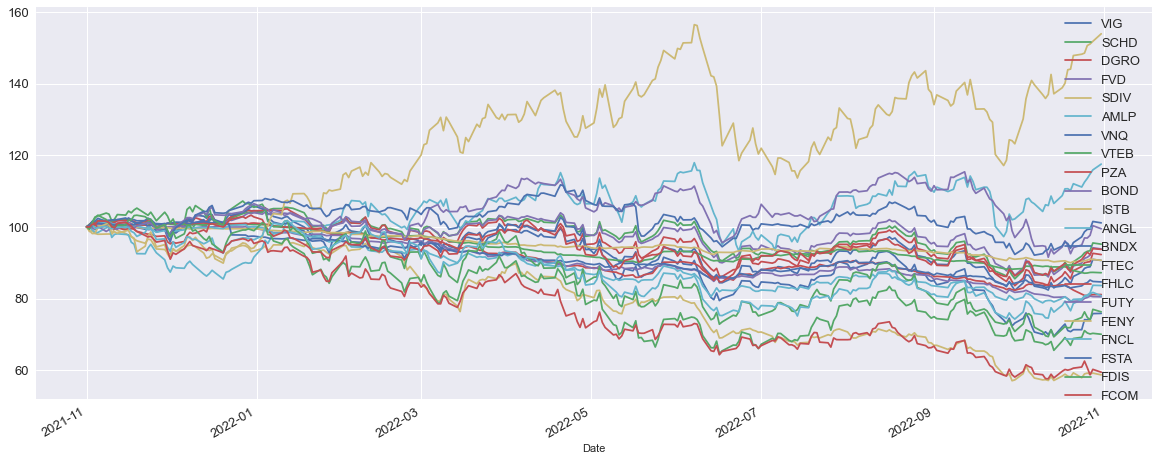

In [23]:
# normalized perfomance chart but not well visible
norm_pricing.plot(figsize = (20, 8),fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [24]:
returns = df.pct_change() 

In [25]:
returns.head()

Symbols,VIG,SCHD,DGRO,FVD,SDIV,AMLP,VNQ,VTEB,PZA,BOND,ISTB,ANGL,BNDX,FTEC,FHLC,FUTY,FENY,FNCL,FSTA,FDIS,FCOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-02,0.005845,0.006823,0.006203,0.004107,-0.012918,0.000000,0.004745,0.000917,-0.000373,0.001366,0.001184,0.001518,0.003709,0.007243,0.005389,-0.000689,-0.009926,0.001207,0.005059,-0.006613,-0.000186
2021-11-03,0.003571,0.005882,0.004110,0.002887,0.002310,-0.008389,0.003361,0.000916,0.002238,-0.001546,-0.000591,0.002122,-0.001056,0.006263,0.008636,-0.001840,-0.008772,0.006888,0.010524,0.019068,0.007429
2021-11-04,0.003257,-0.003305,-0.001488,-0.002639,-0.007681,-0.007332,-0.009505,0.001281,0.001489,0.001913,0.001578,0.002723,0.003875,0.013831,-0.006791,-0.005300,0.000632,-0.012143,0.000679,0.012511,-0.000737
2021-11-05,0.005110,0.006122,0.004844,0.004330,-0.002322,0.000000,0.005118,0.001645,0.002601,0.004273,0.000788,0.006337,0.004036,0.003032,-0.009215,0.009034,0.016425,0.001904,0.007466,0.007436,0.010517


In [26]:
mean_returns_1=returns.mean()

In [27]:
# mean returns
# mean_returns_1.head()

In [28]:
cov_matrix_1= returns.cov()

In [29]:
cov_matrix_1.head()

Symbols,VIG,SCHD,DGRO,FVD,SDIV,AMLP,VNQ,VTEB,PZA,BOND,ISTB,ANGL,BNDX,FTEC,FHLC,FUTY,FENY,FNCL,FSTA,FDIS,FCOM
Symbols,,,,,,,,,,,,,,,,,,,,,
VIG,0.000151,0.000133,0.000146,0.000123,0.000108,0.000114,0.000149,0.000008,0.000010,0.000016,0.000010,0.000064,0.000011,0.000216,0.000131,0.000107,0.000110,0.000169,0.000112,0.000214,0.000178
SCHD,0.000133,0.000131,0.000133,0.000115,0.000103,0.000123,0.000131,0.000006,0.000006,0.000012,0.000008,0.000055,0.000008,0.000179,0.000114,0.000101,0.000131,0.000160,0.000103,0.000179,0.000152
DGRO,0.000146,0.000133,0.000144,0.000121,0.000111,0.000119,0.000144,0.000007,0.000009,0.000015,0.000009,0.000062,0.000010,0.000206,0.000127,0.000106,0.000119,0.000171,0.000109,0.000204,0.000173
FVD,0.000123,0.000115,0.000121,0.000112,0.000096,0.000105,0.000134,0.000007,0.000009,0.000015,0.000009,0.000052,0.000012,0.000158,0.000108,0.000111,0.000105,0.000142,0.000099,0.000159,0.000136
SDIV,0.000108,0.000103,0.000111,0.000096,0.000204,0.000157,0.000131,0.000009,0.000012,0.000015,0.000010,0.000059,0.000010,0.000168,0.000095,0.000081,0.000171,0.000150,0.000075,0.000179,0.000158


# Portfolio perfomance 

In [79]:
# importing data 
def get_data(stocks, start, end):  
    stock_data  = pdr.get_data_yahoo(stocks, start = start, end = end)
    stock_data = stock_data["Close"]
    returns = stock_data.pct_change()
    mean_returns = returns.mean()
    cov_matrix= returns.cov()
    return mean_returns, cov_matrix, stock_data

In [80]:

def portfolio_perfomance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns* weights)*252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(252)
    return returns, std

# Sequential least squares programming
# optimization scipy


In [81]:
def negative_sharp_ratio(weights, mean_returns_1, cov_matrix_1, risk_free_rate = 0):
    preturns, pstd = portfolio_perfomance(weights, mean_returns_1, cov_matrix_1)
    return - (preturns - risk_free_rate)/pstd

def max_sharpe_ratio(mean_returns_1,cov_matrix_1, risk_free_rate = 0, constraint_set = (0,1)):
    """minimize sharpe ratio by minimizing negative sharpe ratio. finding highest possible return with the lowest risk"""
    num_assets = len(mean_returns_1)
    args = (mean_returns_1, cov_matrix_1, risk_free_rate)
    constraints = ({"type":"eq","fun":lambda x: np.sum(x)-1})
    bound = constraint_set
    bounds = tuple(bound for asset in range(num_assets))
    result = stats.optimize.minimize(negative_sharp_ratio, num_assets*[1./num_assets], args = args,
                            method = "SLSQP", bounds= bounds, constraints = constraints)
    return result

In [82]:
# minimum amount of risk #std
def portfolio_variance(weights, mean_returns, cov_matrix):
    return portfolio_perfomance(weights, mean_returns, cov_matrix)[1]

In [83]:
def minimize_variance (mean_returns_1,cov_matrix_1, constraint_set = (0,1)):
    """minimize the portfolio variance by altering the weights/ allocation of assets on the portfolio"""
    num_assets = len(mean_returns_1)
    args = (mean_returns_1, cov_matrix_1)
    constraints = ({"type":"eq","fun":lambda x: np.sum(x)-1})
    bound = constraint_set
    bounds = tuple(bound for asset in range(num_assets))
    result = stats.optimize.minimize(portfolio_variance, num_assets*[1./num_assets], args = args,
                            method = "SLSQP", bounds= bounds, constraints = constraints)
    return result

In [84]:

def portfolio_returns(weights,mean_returns_1, cov_matrix_1 ):
    return portfolio_perfomance(weights, mean_returns_1, cov_matrix_1)[0]

In [85]:
def efficient_optimization(mean_returns_1,cov_matrix_1,return_target, constraint_set = (0,1)):
    """for each return target... optimize the portfolio for mean variance """
    num_assets = len(mean_returns_1)
    args = (mean_returns_1, cov_matrix_1)

    constraints = ({"type":"eq","fun": lambda x: portfolio_returns(x, mean_returns_1, cov_matrix_1) - return_target},
                    {"type":"eq","fun":lambda x: np.sum(x)-1})
    bound = constraint_set
    bounds = tuple(bound for asset in range (num_assets))
    efficient_opt = stats.optimize.minimize(portfolio_variance, num_assets*[1./num_assets], args = args,
                                           method = "SLSQP", bounds = bounds, constraints = constraints)
    return efficient_opt


In [86]:
def calculated_results(mean_returns_1,cov_matrix_1, risk_free_rate = 0, constraint_set = (0,1)):
    """read in mean, cov matrix and other financial infrmation...
    output, maxsr, min vol, efficient fronteer"""
    #     max sharpe ratio portfolio
    max_sharpe_ratio_portfolio = max_sharpe_ratio(mean_returns_1,cov_matrix_1)
    max_sr_returns,max_sr_std = portfolio_perfomance(max_sharpe_ratio_portfolio["x"], mean_returns_1, cov_matrix_1)
    max_sr_returns,max_sr_std = round(max_sr_returns*100,2),round(max_sr_std*100,2)
    max_sr_allocation =pd.DataFrame(max_sharpe_ratio_portfolio["x"], index = mean_returns_1.index, columns= ["allocation"])
    max_sr_allocation.allocation = [round (i*100,0)for i in max_sr_allocation.allocation]
    
    #     min volatility portfolio
    min_var = minimize_variance(mean_returns_1,cov_matrix_1)
    min_var_returns,min_var_std = portfolio_perfomance(min_var["x"], mean_returns_1, cov_matrix_1)
    min_var_returns,min_var_std = round(min_var_returns*100,2),round(min_var_std*100,2)
    min_var_allocation =pd.DataFrame(min_var["x"], index = mean_returns_1.index, columns= ["allocation"])
    min_var_allocation.allocation = [round (i*100,0)for i in min_var_allocation.allocation]
    
    #efficient fronteer
    efficient_list = []
    target_returns =np.linspace(min_var_returns, max_sr_returns, 20)
    for target in  target_returns:
        efficient_list.append(efficient_optimization(mean_returns_1,cov_matrix_1, target)["fun"])
        
    return max_sr_returns, max_sr_std, max_sr_allocation, min_var_returns, min_var_std, min_var_allocation, efficient_list


In [87]:
max_sr_returns, max_sr_std, max_sr_allocation, min_var_returns, min_var_std, min_var_allocation, efficient_list = calculated_results(mean_returns_1,cov_matrix_1)
